# Partially coherent structured modes and their cross--correlation

In this notebook we study optical vortices in the partially coherent regime.  First, we load a set of functions for this task.

In [3]:
include("PartiallyCoherentSimulation.jl")
using Plots
using BenchmarkTools
gr()

Plots.GRBackend()

The number of threads is

In [3]:
Threads.nthreads()

4

We call the function PCsimulationSC (for Small-Core vortex) or PCsimulationLG (for LG beams), where we get as output the intensity and cross--correlation. 

Use these parameters:
- Small--core case w=0.5, wv=0.5, c=0.3...  the size of the numerical window is $2.5w_0$
- Laguerre--Gaussian w=0.5, c=0.5... the size of the numerical window is $4w_0$


## Small-core
We start with the Small-core case:

In [32]:
N=200
Ne=250
w=0.3
wv=1.0
c=0.15
TC=5.
p=0
pts=128
@time I, XI = PCsimulationSC(N,Ne,w,wv,c,TC,pts);
#@time I, XI = PCsimulationLG(N,Ne,w0=w,circle=c,TopologicalCharge=TC,RadialOrder=p,points=pts);
absI=abs.(I)
absXI=abs.(XI)
absIsc=absI/maximum(absI)
absXIsc=absXI/maximum(absXI);

 33.657495 seconds (1.45 M allocations: 42.772 GiB, 9.24% gc time)


In [33]:
#@code_warntype PCsimulationSC(N,Ne,w,wv,c,TC,pts)

In [34]:
#@benchmark PCsimulationSC(N,Ne,w,wv,c,TC,pts)

Now, we plot the intensity and cross--correlation for the Small--core case:

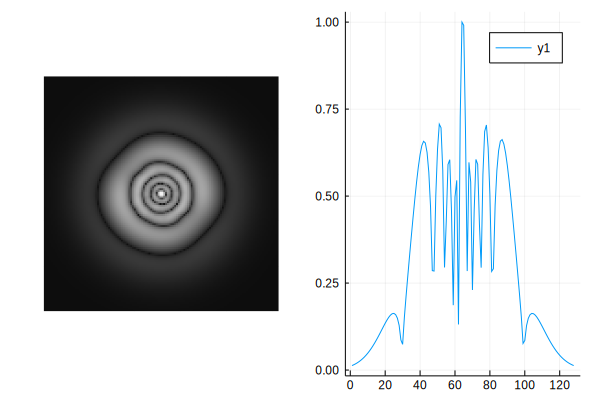

In [35]:
# UNCOMMENT IF USING "GASTON"
#set(palette="gray")
#imagesc([absI' absXI'],gpcom="set size ratio -1; unset tics; unset colorbox")\
p1=heatmap(sqrt.(absXIsc)', aspect_ratio=1, colorbar=false, color=:grays, axis=:off) # plotlyjs
p2=plot(sqrt.(absXIsc[:,div(end,2)+1]))
plot(p1, p2, layout=(1,2))

## Laguerre-Gaussian 
Then, we compute the Laguerre--Gaussian case:

In [37]:
N=50
Ne=100
w=0.5
wv=0.5
c=0.4
TC=2
p=2
pts=128
#@time I, XI = PCsimulationSC(N,Ne,w0=w,wV=wv,circle=c,TopologicalCharge=TC,points=pts);
@time I, XI = PCsimulationLG(N,Ne,w0=w,circle=c,TopologicalCharge=TC,RadialOrder=p,points=pts);
absI=abs.(I)
absXI=abs.(XI)
absIlg1=absI/maximum(absI)
absXIlg1=absXI/maximum(absXI);

  5.173052 seconds (73.53 k allocations: 4.389 GiB, 5.78% gc time)


Then, we plot the partially coherent LG case

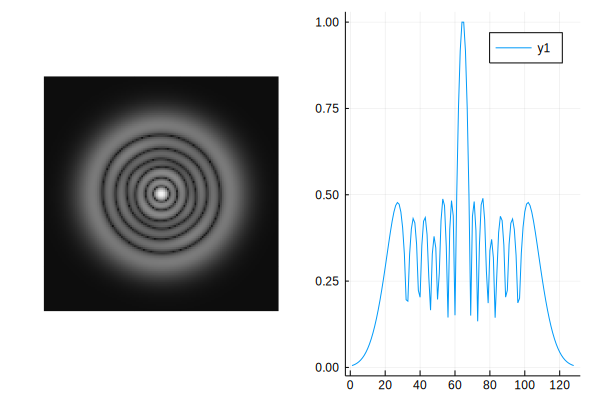

In [38]:
p1=heatmap(sqrt.(absXIlg1)', aspect_ratio=1, colorbar=false, color=:grays, axis=:off) # plotlyjs
p2=plot(sqrt.(absXIlg1[:,div(end,2)+1]))
plot(p1, p2, layout=(1,2))

Another case, for $l=0$ and the radial index $p\ne 0$

In [39]:
N=50
Ne=200
w=0.5
wv=0.5
c=0.4
TC=0
p=3
pts=128
#@time I, XI = PCsimulationSC(N,Ne,w0=w,wV=wv,circle=c,TopologicalCharge=TC,points=pts);
@time I, XI = PCsimulationLG(N,Ne,w0=w,circle=c,TopologicalCharge=TC,RadialOrder=p,points=pts);
absI=abs.(I)
absXI=abs.(XI)
absIlg=absI/maximum(absI)
absXIlg=absXI/maximum(absXI);

 13.644605 seconds (152.61 k allocations: 8.813 GiB, 3.76% gc time)


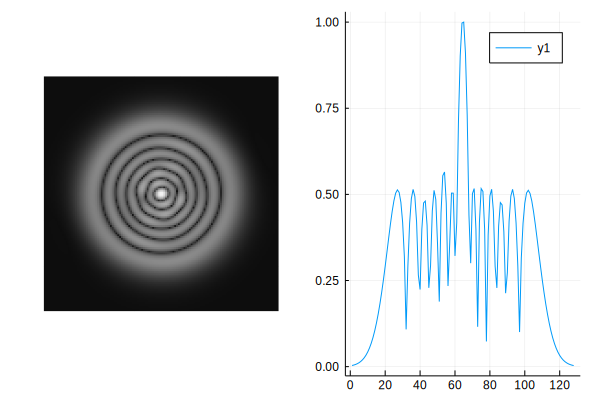

In [40]:
p1=heatmap(sqrt.(absXIlg)', aspect_ratio=1, colorbar=false, color=:grays, axis=:off) # plotlyjs
p2=plot(sqrt.(absXIlg[:,div(end,2)+1]))
plot(p1, p2, layout=(1,2))

## Hermite-Gaussian
The following commands compute the Hermite--Gaussian partially coherent case

In [41]:
N=200
Ne=200
w=1.2
wv=0.5
c=0.9*w
mm=4    # x-direction
nn=4    # y-direction
pts=128
@time I, XI = PCsimulationHG(N,Ne,w0=w,circle=c,m=mm,n=nn,points=pts);
absI=abs.(I)
absXI=abs.(XI)
absIhg=absI/maximum(absI)
absXIhg=absXI/maximum(absXI);

 54.169481 seconds (1.28 M allocations: 34.464 GiB, 3.97% gc time)


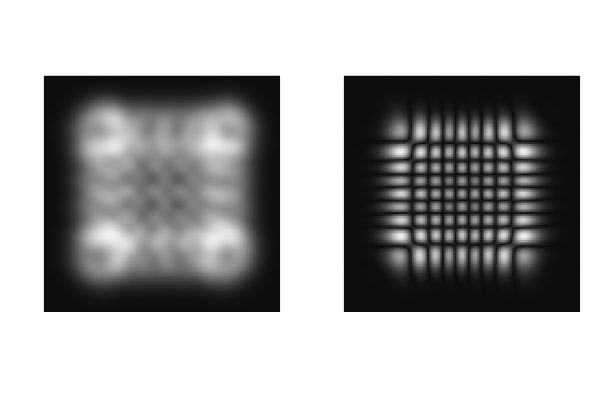

In [42]:
p1=heatmap((absIhg)', aspect_ratio=1, colorbar=false, color=:grays, axis=:off) # plotlyjs
p2=heatmap((absXIhg)', aspect_ratio=1, colorbar=false, color=:grays, axis=:off) # plotlyjs
plot(p1, p2, layout=(1,2))

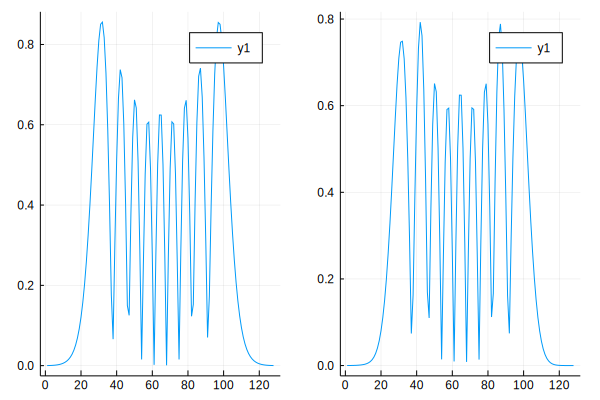

In [43]:
p1=heatmap((absXIhg)', aspect_ratio=1, colorbar=false, color=:grays, axis=:off) # plotlyjs
p2=plot((absXIhg[:,div(end,2)+1]))
p3=plot((absXIhg[div(end,2)+1,:]))
plot(p2, p3, layout=(1,2))

## Ince-Gaussian

Now, we study Ince-Gaussian beams in the low spatial coherence regime.  First, even Ince-Gaussian $p=4$, $q=0$, with varying $q$ (ellipticity).

In [23]:
#@benchmark PCsimulationIG(10,1,w,c,p,m,q,parity,pts)

In [8]:
N=100; Ne=200; w=1.0; c=0.9*w; p=4; m=0; q=0.0001
parity=0
pts=96
@time I, XI = PCsimulationIG(N,Ne,w,c,p,m,q,parity,pts);
absI=abs.(I)
absXI=abs.(XI)
absIGg=absI/maximum(absI)
absXIGg=absXI/maximum(absXI);

 82.407582 seconds (677.07 M allocations: 75.520 GiB, 27.31% gc time)


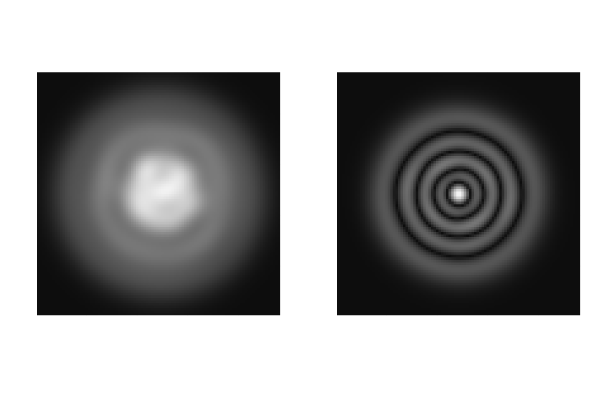

In [9]:
# Plots
p1=heatmap((absIGg)', aspect_ratio=1, colorbar=false, color=:grays, axis=:off) # plotlyjs
p2=heatmap((absXIGg)', aspect_ratio=1, colorbar=false, color=:grays, axis=:off) # plotlyjs
plot(p1, p2, layout=(1,2))

In [46]:
N=100; Ne=200; w=1.0; c=0.9*w; p=4; m=0; q=0.25
parity=0
pts=96
@time I, XI = PCsimulationIG(N,Ne,w,c,p,m,q,parity,pts);
absI=abs.(I)
absXI=abs.(XI)
absIGg=absI/maximum(absI)
absXIGg=absXI/maximum(absXI);

120.306343 seconds (751.38 M allocations: 82.001 GiB, 46.83% gc time)


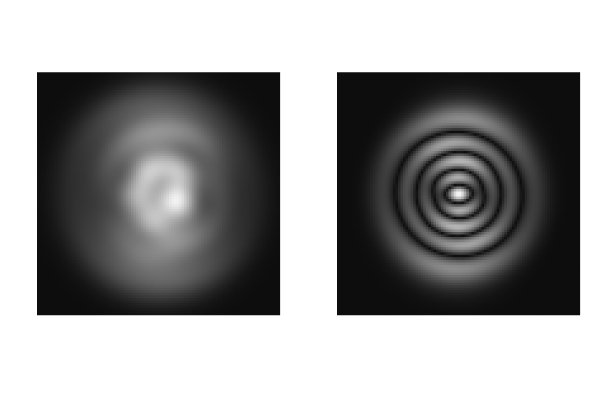

In [47]:
# Plots
p1=heatmap((absIGg)', aspect_ratio=1, colorbar=false, color=:grays, axis=:off) # plotlyjs
p2=heatmap((absXIGg)', aspect_ratio=1, colorbar=false, color=:grays, axis=:off) # plotlyjs
plot(p1, p2, layout=(1,2))

In [49]:
N=100; Ne=200; w=1.0; c=0.9*w; p=4; m=0; q=0.5
parity=0
pts=96
@time I, XI = PCsimulationIG(N,Ne,w,c,p,m,q,parity,pts);
absI=abs.(I)
absXI=abs.(XI)
absIGg=absI/maximum(absI)
absXIGg=absXI/maximum(absXI);

124.919138 seconds (762.77 M allocations: 83.089 GiB, 47.41% gc time)


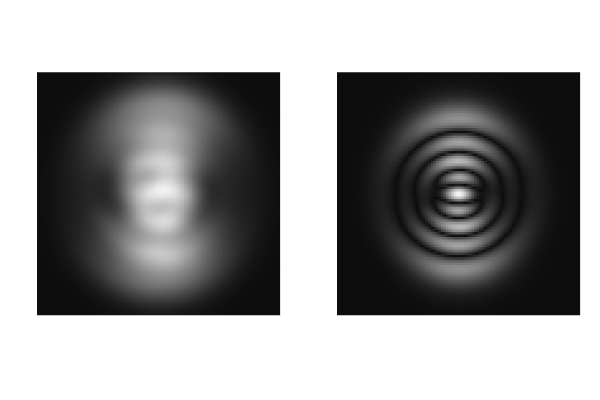

In [50]:
# Plots
p1=heatmap((absIGg)', aspect_ratio=1, colorbar=false, color=:grays, axis=:off) # plotlyjs
p2=heatmap((absXIGg)', aspect_ratio=1, colorbar=false, color=:grays, axis=:off) # plotlyjs
plot(p1, p2, layout=(1,2))

In [56]:
N=100; Ne=200; w=1.0; c=0.9*w; p=4; m=0; q=1.
parity=0
pts=96
@time I, XI = PCsimulationIG(N,Ne,w,c,p,m,q,parity,pts);
absI=abs.(I)
absXI=abs.(XI)
absIGg=absI/maximum(absI)
absXIGg=absXI/maximum(absXI);

120.837497 seconds (752.90 M allocations: 82.143 GiB, 46.93% gc time)


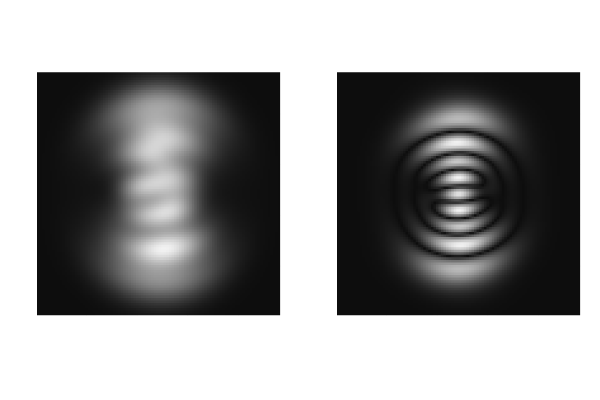

In [58]:
# Plots
p1=heatmap((absIGg)', aspect_ratio=1, colorbar=false, color=:grays, axis=:off) # plotlyjs
p2=heatmap((absXIGg)', aspect_ratio=1, colorbar=false, color=:grays, axis=:off) # plotlyjs
plot(p1, p2, layout=(1,2))

In [60]:
N=100; Ne=200; w=1.0; c=0.9*w; p=4; m=0; q=5.
parity=0
pts=96
@time I, XI = PCsimulationIG(N,Ne,w,c,p,m,q,parity,pts);
absI=abs.(I)
absXI=abs.(XI)
absIGg=absI/maximum(absI)
absXIGg=absXI/maximum(absXI);

121.933684 seconds (758.33 M allocations: 82.626 GiB, 46.83% gc time)


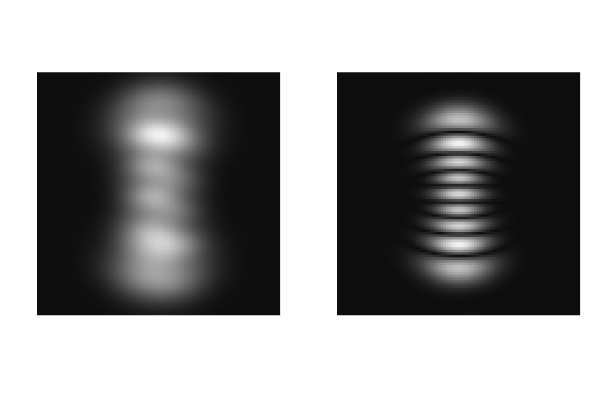

In [61]:
# Plots
p1=heatmap((absIGg)', aspect_ratio=1, colorbar=false, color=:grays, axis=:off) # plotlyjs
p2=heatmap((absXIGg)', aspect_ratio=1, colorbar=false, color=:grays, axis=:off) # plotlyjs
plot(p1, p2, layout=(1,2))

In [62]:
N=100; Ne=200; w=1.0; c=0.9*w; p=4; m=0; q=1000.
parity=0
pts=96
@time I, XI = PCsimulationIG(N,Ne,w,c,p,m,q,parity,pts);
absI=abs.(I)
absXI=abs.(XI)
absIGg=absI/maximum(absI)
absXIGg=absXI/maximum(absXI);

120.163081 seconds (765.67 M allocations: 83.380 GiB, 48.59% gc time)


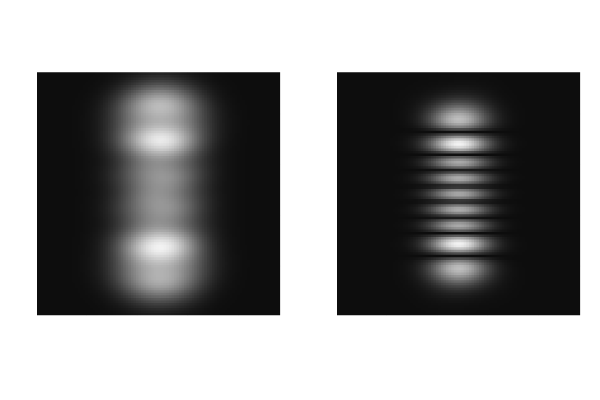

In [63]:
# Plots
p1=heatmap((absIGg)', aspect_ratio=1, colorbar=false, color=:grays, axis=:off) # plotlyjs
p2=heatmap((absXIGg)', aspect_ratio=1, colorbar=false, color=:grays, axis=:off) # plotlyjs
plot(p1, p2, layout=(1,2))

Now, odd Ince-Gaussian beams

In [37]:
N=100; Ne=200; w=1.0; c=0.5*w; p=4; m=2; q=0.0001
parity=1
pts=96
@time I, XI = PCsimulationIG(N,Ne,w,c,p,m,q,parity,pts);
absI=abs.(I)
absXI=abs.(XI)
absIGg=absI/maximum(absI)
absXIGg=absXI/maximum(absXI);

129.792754 seconds (1.29 G allocations: 115.552 GiB, 16.92% gc time)


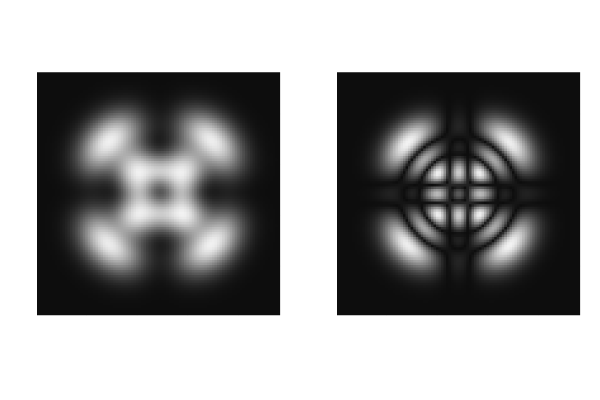

In [38]:
# Plots
p1=heatmap((absIGg)', aspect_ratio=1, colorbar=false, color=:grays, axis=:off) # plotlyjs
p2=heatmap((absXIGg)', aspect_ratio=1, colorbar=false, color=:grays, axis=:off) # plotlyjs
plot(p1, p2, layout=(1,2))

In [39]:
N=100; Ne=200; w=1.0; c=0.5*w; p=4; m=2; q=0.25
parity=1
pts=96
@time I, XI = PCsimulationIG(N,Ne,w,c,p,m,q,parity,pts);
absI=abs.(I)
absXI=abs.(XI)
absIGg=absI/maximum(absI)
absXIGg=absXI/maximum(absXI);

128.924561 seconds (1.29 G allocations: 115.552 GiB, 16.77% gc time)


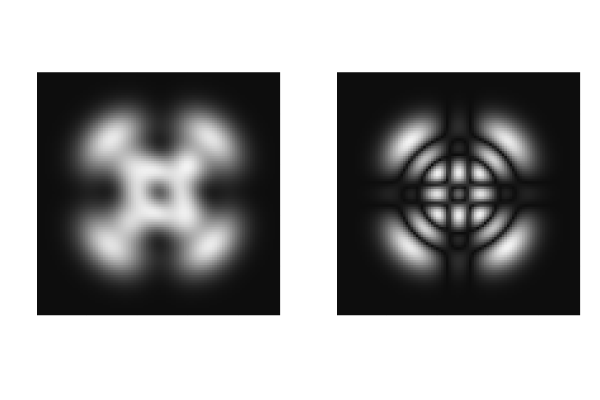

In [40]:
# Plots
p1=heatmap((absIGg)', aspect_ratio=1, colorbar=false, color=:grays, axis=:off) # plotlyjs
p2=heatmap((absXIGg)', aspect_ratio=1, colorbar=false, color=:grays, axis=:off) # plotlyjs
plot(p1, p2, layout=(1,2))

In [41]:
N=100; Ne=200; w=1.0; c=0.5*w; p=4; m=2; q=0.5
parity=1
pts=96
@time I, XI = PCsimulationIG(N,Ne,w,c,p,m,q,parity,pts);
absI=abs.(I)
absXI=abs.(XI)
absIGg=absI/maximum(absI)
absXIGg=absXI/maximum(absXI);

128.345980 seconds (1.29 G allocations: 115.552 GiB, 16.97% gc time)


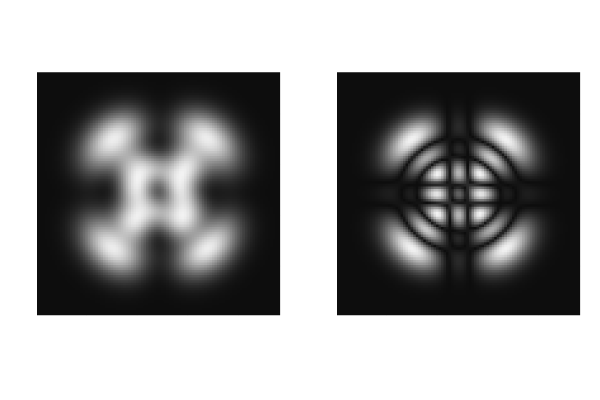

In [42]:
# Plots
p1=heatmap((absIGg)', aspect_ratio=1, colorbar=false, color=:grays, axis=:off) # plotlyjs
p2=heatmap((absXIGg)', aspect_ratio=1, colorbar=false, color=:grays, axis=:off) # plotlyjs
plot(p1, p2, layout=(1,2))

In [45]:
N=100; Ne=200; w=1.0; c=0.5*w; p=4; m=2; q=2.5
parity=1
pts=96
@time I, XI = PCsimulationIG(N,Ne,w,c,p,m,q,parity,pts);
absI=abs.(I)
absXI=abs.(XI)
absIGg=absI/maximum(absI)
absXIGg=absXI/maximum(absXI);

130.143159 seconds (1.29 G allocations: 115.552 GiB, 16.63% gc time)


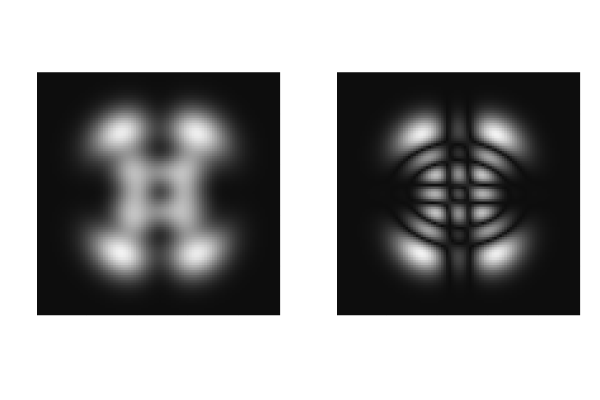

In [46]:
# Plots
p1=heatmap((absIGg)', aspect_ratio=1, colorbar=false, color=:grays, axis=:off) # plotlyjs
p2=heatmap((absXIGg)', aspect_ratio=1, colorbar=false, color=:grays, axis=:off) # plotlyjs
plot(p1, p2, layout=(1,2))

In [55]:
N=100; Ne=200; w=1.0; c=0.5*w; p=4; m=2; q=7.
parity=1
pts=96
@time I, XI = PCsimulationIG(N,Ne,w,c,p,m,q,parity,pts);
absI=abs.(I)
absXI=abs.(XI)
absIGg=absI/maximum(absI)
absXIGg=absXI/maximum(absXI);

133.450414 seconds (1.29 G allocations: 115.552 GiB, 16.98% gc time)


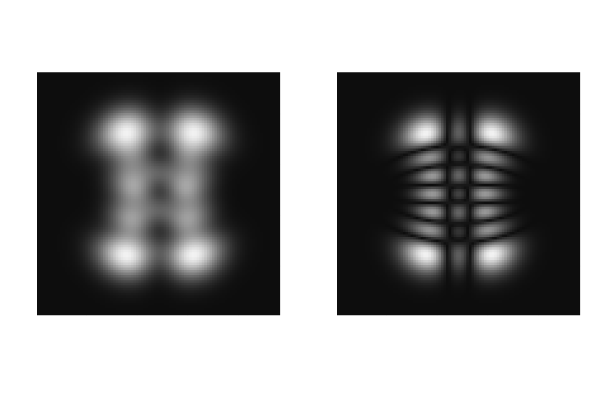

In [56]:
# Plots
p1=heatmap((absIGg)', aspect_ratio=1, colorbar=false, color=:grays, axis=:off) # plotlyjs
p2=heatmap((absXIGg)', aspect_ratio=1, colorbar=false, color=:grays, axis=:off) # plotlyjs
plot(p1, p2, layout=(1,2))

In [57]:
N=100; Ne=200; w=1.0; c=0.5*w; p=4; m=2; q=1000.
parity=1
pts=96
@time I, XI = PCsimulationIG(N,Ne,w,c,p,m,q,parity,pts);
absI=abs.(I)
absXI=abs.(XI)
absIGg=absI/maximum(absI)
absXIGg=absXI/maximum(absXI);

124.240800 seconds (1.29 G allocations: 115.552 GiB, 17.51% gc time)


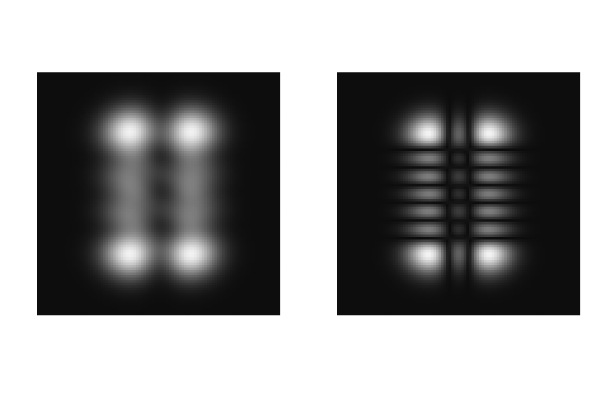

In [58]:
 # Plots
p1=heatmap((absIGg)', aspect_ratio=1, colorbar=false, color=:grays, axis=:off) # plotlyjs
p2=heatmap((absXIGg)', aspect_ratio=1, colorbar=false, color=:grays, axis=:off) # plotlyjs
plot(p1, p2, layout=(1,2))

Helical modes

In [86]:
N=100; Ne=500; w=1.0; c=0.6*w; p=7; m=3; q=0.4
parity=2
pts=96
@time I, XI = PCsimulationIG(N,Ne,w,c,p,m,q,parity,pts);
absI=abs.(I)
absXI=abs.(XI)
absIGg=absI/maximum(absI)
absXIGg=absXI/maximum(absXI);

979.232549 seconds (10.14 G allocations: 1.074 TiB, 19.78% gc time)


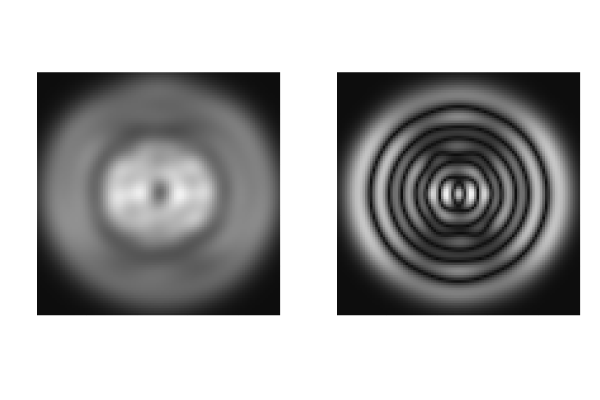

In [87]:
 # Plots
p1=heatmap((absIGg)', aspect_ratio=1, colorbar=false, color=:grays, axis=:off) # plotlyjs
p2=heatmap((absXIGg)', aspect_ratio=1, colorbar=false, color=:grays, axis=:off) # plotlyjs
plot(p1, p2, layout=(1,2))